## Heart Disease Prediction Sytsem Using Machin Learning


In [42]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import  RFE, SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load heart data from CSV file into a DataFrame called 'heart_data'
heart_data = pd.read_csv('heart.csv')

In [3]:
# Display the first few rows of the 'heart_data' DataFrame
heart_data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
# Display the last few rows of the 'heart_data' DataFrame
heart_data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [5]:
# Retrieve the shape of the 'heart_data' DataFrame
heart_data.shape

(1025, 14)

In [6]:
# Display the information about the 'heart_data' DataFrame
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
# This line of code appears to be using the .isnull() method on the 'heart_data' DataFrame to check for missing values, 
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

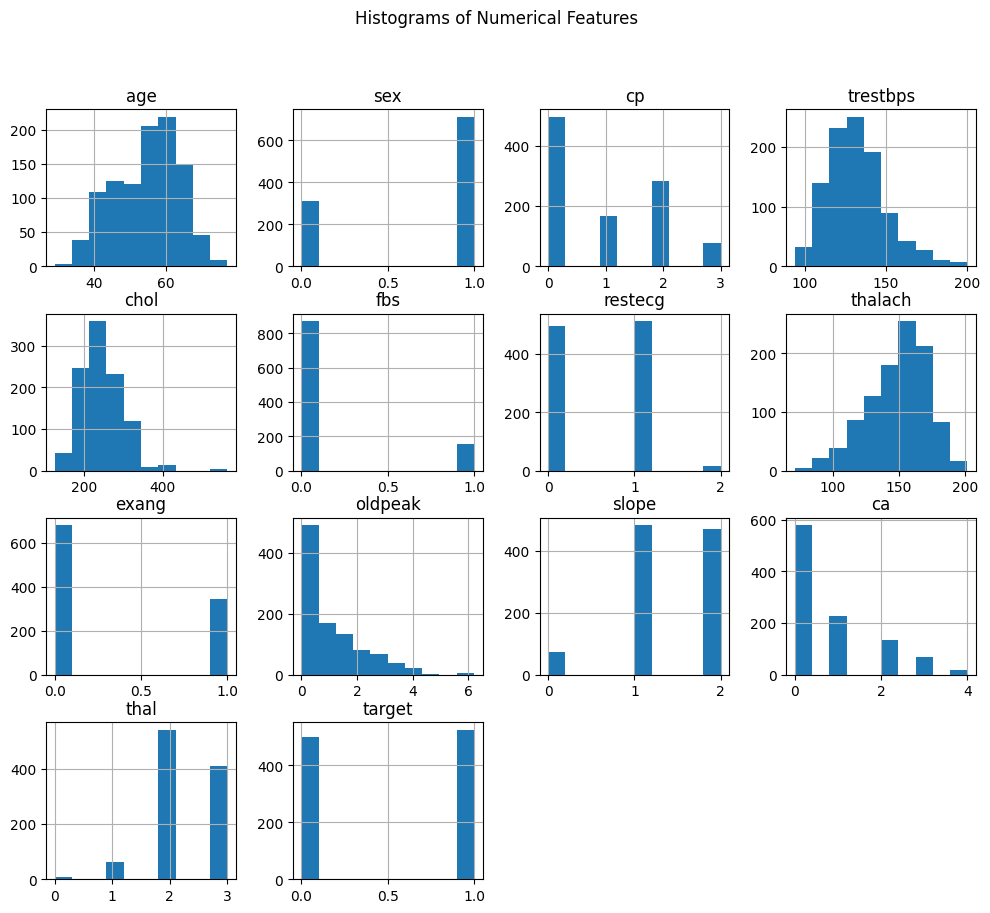

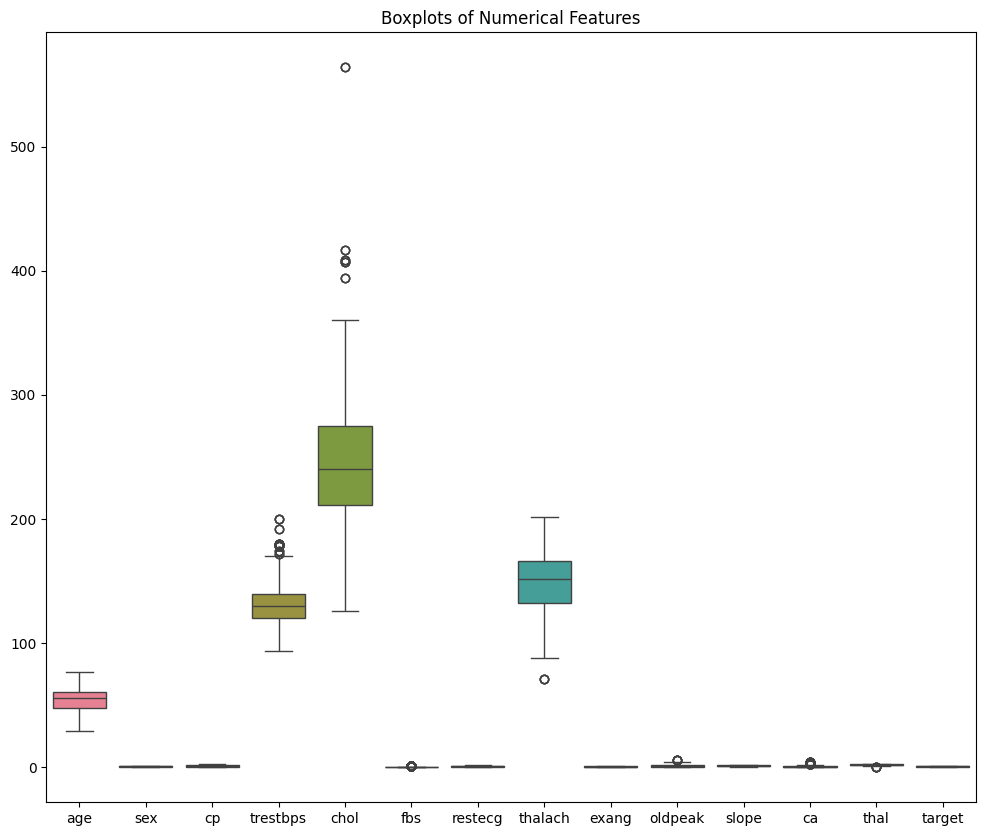

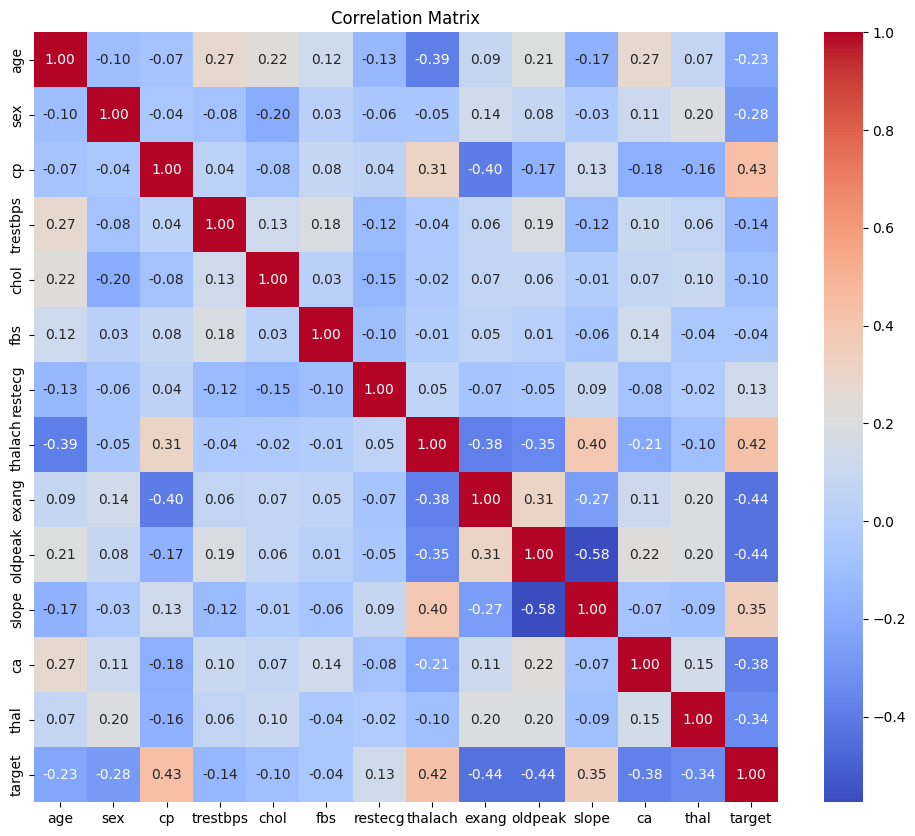

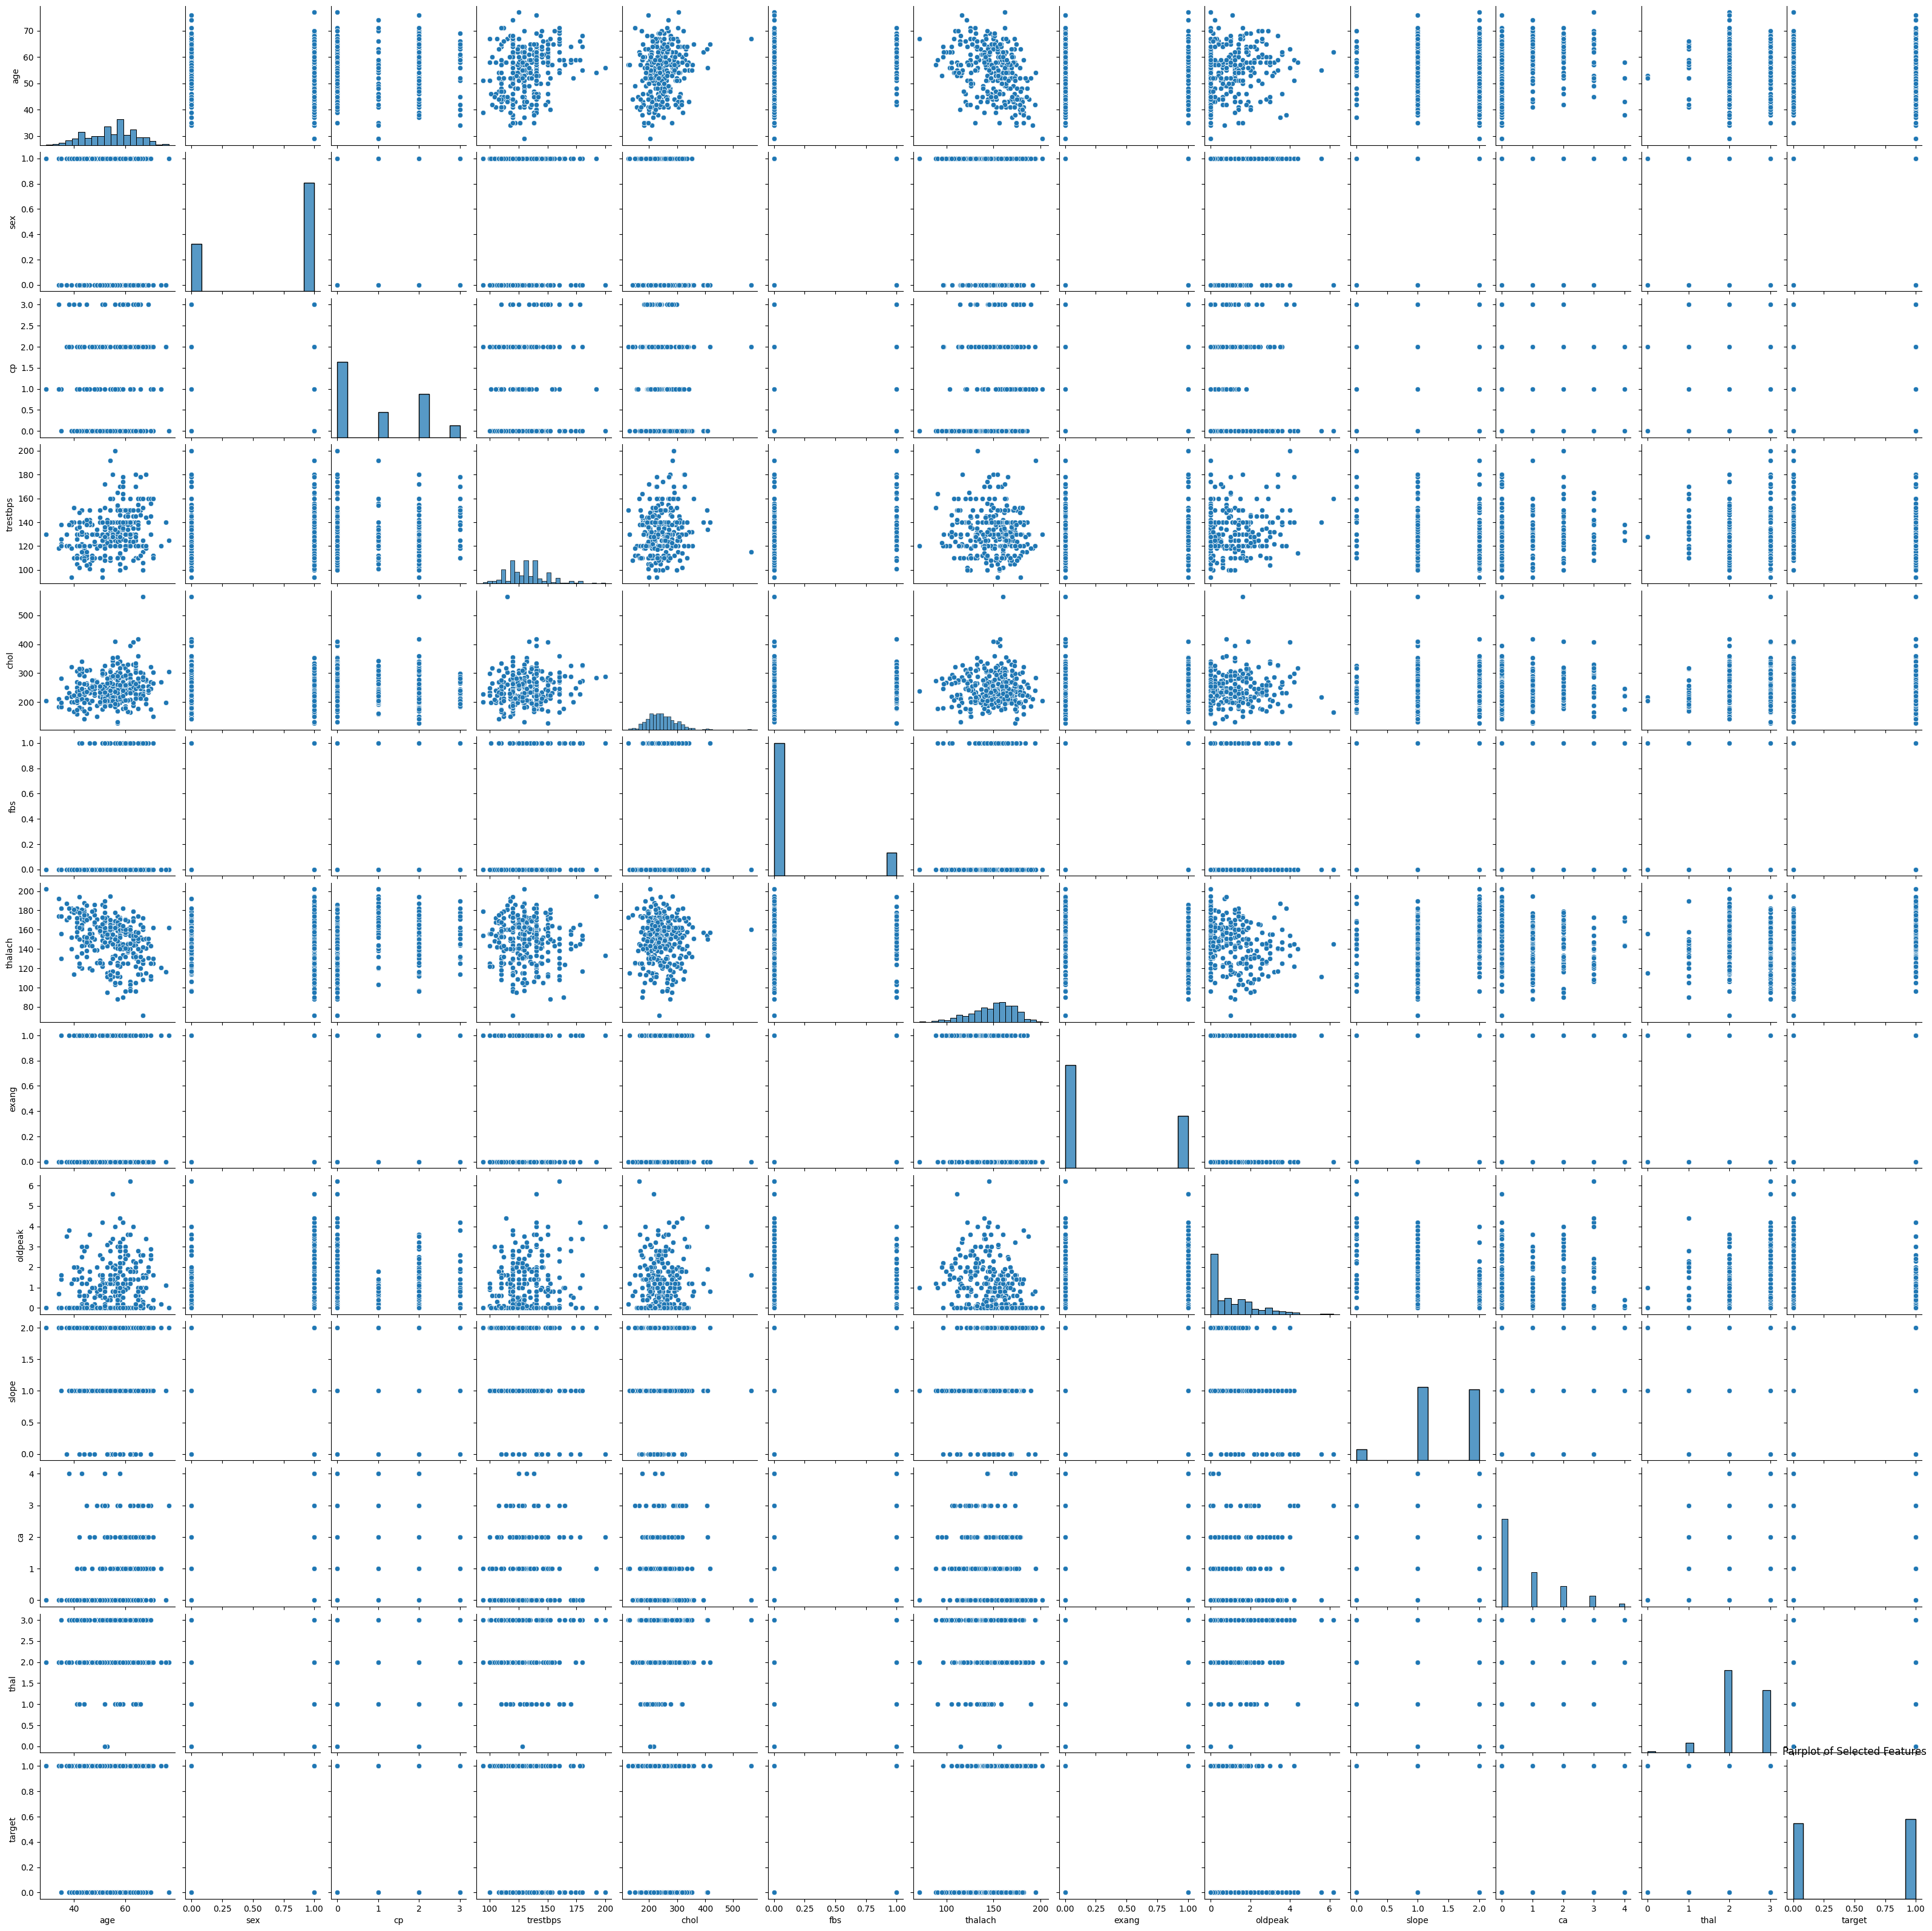

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary Statistics
print(description)

# Histograms for numerical features
heart_data.hist(figsize=(12, 10))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(12, 10))
sns.boxplot(data=heart_data)
plt.title('Boxplots of Numerical Features')
plt.show()

# Correlation Matrix
correlation_matrix = heart_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
selected_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
sns.pairplot(heart_data[selected_features])
plt.title('Pairplot of Selected Features')
plt.show()

<Figure size 1000x600 with 0 Axes>

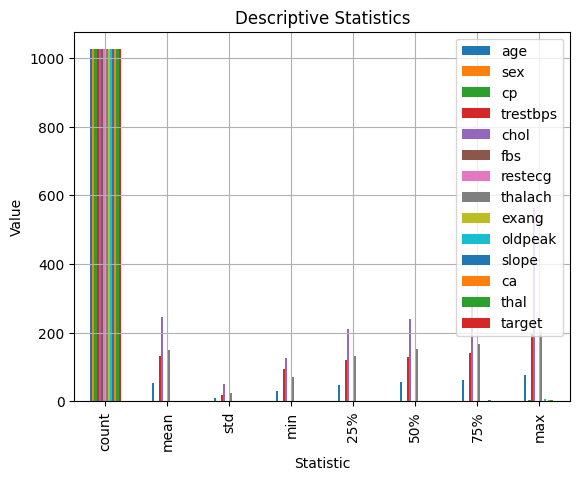

In [8]:
import matplotlib.pyplot as plt

# Generate descriptive statistics
description = heart_data.describe()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
description.plot(kind='bar')
plt.title('Descriptive Statistics')
plt.ylabel('Value')
plt.xlabel('Statistic')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

In [9]:
# This line of code is using the value_counts() method on the 'target' column of the 'heart_data' DataFrame.
# It counts the occurrences of each unique value in the 'target' column and returns a Series object 
# with the counts of each unique value.
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [10]:
# Assigning input features to variable X by dropping the 'target' column from the 'heart_data' DataFrame
# axis=1 specifies that we are dropping a column
X = heart_data.drop(columns='target', axis=1)

# Assigning the target variable to variable Y
Y = heart_data['target']

In [11]:
# Printing the input features (X) DataFrame
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [12]:
# Printing the target variable (Y) Series
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets for both input features (X) and target variable (Y)
# X_train: Training input features
# X_test: Testing input features
# Y_train: Training target variable
# Y_test: Testing target variable
# test_size=0.2: Specifies that 20% of the data will be used for testing, and the rest will be used for training
# stratify=Y: Ensures that the distribution of classes in the target variable Y is preserved in both the training and testing sets
# random_state=2: Provides a seed for random number generation to ensure reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [14]:
# Printing the shapes of the original input features (X), training input features (X_train), and testing input features (X_test)
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


## Logistic Regression

In [15]:
# Logistic Regression
model = LogisticRegression()  # Initialize Logistic Regression model
model.fit(X_train, Y_train)  # Train Logistic Regression model
Y_pred_logreg = model.predict(X_test)  # Predict using Logistic Regression model
logreg_accuracy = accuracy_score(Y_test, Y_pred_logreg)  # Calculate accuracy of Logistic Regression model
print("Logistic Regression Accuracy:", logreg_accuracy)  # Print accuracy of Logistic Regression model

Logistic Regression Accuracy: 0.8341463414634146


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Predicting the target values for the training data using the trained model.
X_train_prediction = model.predict(X_train)

# Calculating the accuracy of the model's predictions on the training data.
# This is done by comparing the predicted values (X_train_prediction) with the actual target values (Y_train).
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [17]:
# Printing the accuracy of the model's predictions on the training data.
# This provides a measure of how well the model is performing on the data it was trained on.
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8463414634146341


In [18]:
# Predicting the target values for the test data using the trained model.
X_test_prediction = model.predict(X_test)

# Calculating the accuracy of the model's predictions on the test data.
# This is done by comparing the predicted values (X_test_prediction) with the actual target values (Y_test).
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [19]:
# Printing the accuracy of the model's predictions on the test data.
# This provides insight into how well the model generalizes to unseen data, giving an indication of its performance in real-world scenarios.
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8341463414634146


In [20]:
model = LogisticRegression()  # Initialize Logistic Regression model
logreg_cv_scores = cross_val_score(model, X, Y, cv=5)  # Perform cross-validation
logreg_cv_accuracy = np.mean(logreg_cv_scores)  # Calculate mean accuracy from cross-validation
print("Logistic Regression Cross-Validation Accuracy:", logreg_cv_accuracy)  # Print cross-validation accuracy

C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Cross-Validation Accuracy: 0.8429268292682928


## Random Forest

In [21]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets for both input features (X) and target variable (Y)
# X_train: Training input features
# X_test: Testing input features
# Y_train: Training target variable
# Y_test: Testing target variable
# test_size=0.2: Specifies that 20% of the data will be used for testing, and the rest will be used for training
# stratify=Y: Ensures that the distribution of classes in the target variable Y is preserved in both the training and testing sets
# random_state=2: Provides a seed for random number generation to ensure reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [22]:
# Printing the shapes of the original input features (X), training input features (X_train), and testing input features (X_test)
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [23]:
# Random Forest
model2 = RandomForestClassifier()  # Initialize Random Forest model
model2.fit(X_train, Y_train)  # Train Random Forest model
Y_pred_rf = model2.predict(X_test)  # Predict using Random Forest model
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)  # Calculate accuracy of Random Forest model
print("Random Forest Accuracy:", rf_accuracy)  # Print accuracy of Random Forest model

Random Forest Accuracy: 1.0


In [24]:
# Predicting the target values for the training data using the trained model.
X_train_prediction2 = model2.predict(X_train)

# Calculating the accuracy of the model's predictions on the training data.
# This is done by comparing the predicted values (X_train_prediction) with the actual target values (Y_train).
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [25]:
# Predicting the target values for the test data using the trained model.
X_test_prediction = model2.predict(X_test)

# Calculating the accuracy of the model's predictions on the test data.
# This is done by comparing the predicted values (X_test_prediction) with the actual target values (Y_test).
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [26]:
# Printing the accuracy of the model's predictions on the test data.
# This provides insight into how well the model generalizes to unseen data, giving an indication of its performance in real-world scenarios.
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  1.0


In [27]:
# Random Forest
model2 = RandomForestClassifier()  # Initialize Random Forest model
rf_cv_scores = cross_val_score(model2, X, Y, cv=5)  # Perform cross-validation
rf_cv_accuracy = np.mean(rf_cv_scores)  # Calculate mean accuracy from cross-validation
print("Random Forest Cross-Validation Accuracy:", rf_cv_accuracy)  # Print cross-validation accuracy

Random Forest Cross-Validation Accuracy: 0.9970731707317073


## # Decision Tree

In [28]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets for both input features (X) and target variable (Y)
# X_train: Training input features
# X_test: Testing input features
# Y_train: Training target variable
# Y_test: Testing target variable
# test_size=0.2: Specifies that 20% of the data will be used for testing, and the rest will be used for training
# stratify=Y: Ensures that the distribution of classes in the target variable Y is preserved in both the training and testing sets
# random_state=2: Provides a seed for random number generation to ensure reproducibility of the split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [29]:
# Printing the shapes of the original input features (X), training input features (X_train), and testing input features (X_test)
print(X.shape, X_train.shape, X_test.shape)

(1025, 13) (820, 13) (205, 13)


In [30]:
# Decision Tree
model3= DecisionTreeClassifier()  # Initialize Decision Tree model
model3.fit(X_train, Y_train)  # Train Decision Tree model
Y_pred_dt = model3.predict(X_test)  # Predict using Decision Tree model
dt_accuracy = accuracy_score(Y_test, Y_pred_dt)  # Calculate accuracy of Decision Tree model
print("Decision Tree Accuracy:", dt_accuracy)  # Print accuracy of Decision Tree model

Decision Tree Accuracy: 0.9853658536585366


In [31]:
# Predicting the target values for the training data using the trained model.
X_train_prediction = model3.predict(X_train)

# Calculating the accuracy of the model's predictions on the training data.
# This is done by comparing the predicted values (X_train_prediction) with the actual target values (Y_train).
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [32]:
# Printing the accuracy of the model's predictions on the training data.
# This provides a measure of how well the model is performing on the data it was trained on.
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  1.0


In [33]:
# Predicting the target values for the test data using the trained model.
X_test_prediction = model3.predict(X_test)

# Calculating the accuracy of the model's predictions on the test data.
# This is done by comparing the predicted values (X_test_prediction) with the actual target values (Y_test).
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [34]:
# Printing the accuracy of the model's predictions on the test data.
# This provides insight into how well the model generalizes to unseen data, giving an indication of its performance in real-world scenarios.
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.9853658536585366


In [35]:
# Decision Tree
model3= DecisionTreeClassifier()  # Initialize Decision Tree model
dt_cv_scores = cross_val_score(model3, X, Y, cv=5)  # Perform cross-validation
dt_cv_accuracy = np.mean(dt_cv_scores)  # Calculate mean accuracy from cross-validation
print("Decision Tree Cross-Validation Accuracy:", dt_cv_accuracy)  # Print cross-validation accuracy

Decision Tree Cross-Validation Accuracy: 1.0


# GridSearchCV

In [36]:
# Logistic Regression
model = LogisticRegression()  # Initialize Logistic Regression model
logreg_param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Define hyperparameter grid
logreg_grid_search = GridSearchCV(model, logreg_param_grid, cv=5)  # Perform GridSearchCV
logreg_grid_search.fit(X_train, Y_train)  # Fit the grid search to the data
logreg_best_params = logreg_grid_search.best_params_  # Get the best parameters
print("Logistic Regression Best Parameters:", logreg_best_params)

C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Logistic Regression Best Parameters: {'C': 0.1}


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [37]:
# Random Forest
model2 = RandomForestClassifier()  # Initialize Random Forest model
rf_param_grid = {'n_estimators': [50, 100, 150, 200],
                 'max_depth': [None, 10, 20, 30]}  # Define hyperparameter grid
rf_grid_search = GridSearchCV(model2, rf_param_grid, cv=5)  # Perform GridSearchCV
rf_grid_search.fit(X_train, Y_train)  # Fit the grid search to the data
rf_best_params = rf_grid_search.best_params_  # Get the best parameters
print("Random Forest Best Parameters:", rf_best_params)

Random Forest Best Parameters: {'max_depth': None, 'n_estimators': 50}


In [38]:
# Decision Tree
model3 = DecisionTreeClassifier()  # Initialize Decision Tree model
dt_param_grid = {'max_depth': [None, 10, 20, 30],
                 'min_samples_split': [2, 5, 10]}  # Define hyperparameter grid
dt_grid_search = GridSearchCV(model3, dt_param_grid, cv=5)  # Perform GridSearchCV
dt_grid_search.fit(X_train, Y_train)  # Fit the grid search to the data
dt_best_params = dt_grid_search.best_params_  # Get the best parameters
print("Decision Tree Best Parameters:", dt_best_params)

Decision Tree Best Parameters: {'max_depth': 20, 'min_samples_split': 2}


In [55]:
input_data = (58,0,0,100,248,0,0,122,0,1,1,0,2)

In [56]:
import numpy as np

# Assuming 'input_data' is your input data and 'model3' is your trained DecisionTreeClassifier model

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape input data
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Check if model is fitted
if hasattr(model, 'fit'):
    # Fit the model
    model.fit(X_train, Y_train)
    
    # Make predictions
    prediction = model.predict(input_data_reshaped)
    
    # Print prediction
    print(prediction)
    
    # Check prediction and print result
    if prediction[0] == 0:
        print('The Person does not have a Heart Disease')
    else:
        print('The Person has Heart Disease')
else:
    print("Error: Model has not been fitted.")

[1]
The Person has Heart Disease


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
